# Projeto de Parceria | Semantix

Para a realização desse projeto, estou utilizando os dados da A Lyft Bikes and Scooters, que estão disponiveis para uso publico no Kaggle e podem ser acessdos no link abaixo:
 https://www.kaggle.com/datasets/kirilosyossif/cyclistic-case-study-google-certificate

A Lyft Bikes and Scooters, LLC ("Bikeshare") opera o serviço de compartilhamento de bicicletas Divvy da cidade de Chicago ("City"). A Bikeshare e a Prefeitura estão empenhadas em apoiar a bicicleta como opção de transporte alternativo. Como parte desse compromisso, a Prefeitura permite que a Bikeshare disponibilize ao público determinados dados do sistema Divvy de propriedade da Prefeitura ("Dados").

A proposta desse projeto é realizar uma análise exploratória dos dados e desenvolver um estudo de aprendizado de máquina.

In [35]:
#Importação das bibliotecas

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Estrutura

In [5]:
#Leitura do CSV

path = '202101-divvy-tripdata.csv'
df = pd.read_csv (path) 
df.shape

(96834, 13)

In [6]:
# Análise prévia da base de dados
df.head (5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [7]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [8]:
# Identificando colunas com dados ausentes

df.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name     8625
start_station_id       8625
end_station_name      10277
end_station_id        10277
start_lat                 0
start_lng                 0
end_lat                 103
end_lng                 103
member_casual             0
dtype: int64

In [9]:
# Removendo dados ausentes

df = df.drop(columns = ['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id'])
df.isna().sum()

ride_id            0
rideable_type      0
started_at         0
ended_at           0
start_lat          0
start_lng          0
end_lat          103
end_lng          103
member_casual      0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
# Conversão de tipos de dados

df['started_at']=pd.to_datetime(df['started_at'],format='%Y-%m-%d %H:%M:%S')
df['ended_at']=pd.to_datetime(df['ended_at'],format='%Y-%m-%d %H:%M:%S')

In [12]:
df.dtypes

ride_id                  object
rideable_type            object
started_at       datetime64[ns]
ended_at         datetime64[ns]
start_lat               float64
start_lng               float64
end_lat                 float64
end_lng                 float64
member_casual            object
dtype: object

In [13]:
# Inserindo uma nova coluna. A coluna `duration` representa a duração da corrida de bicicleta em minutos.

df['duration']=df['ended_at']-df['started_at']
df['duration']=df['duration'].apply(lambda x : x.total_seconds()/60)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,41.900341,-87.696743,41.89,-87.72,member,10.416667
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,41.900333,-87.696707,41.90,-87.69,member,4.066667
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,41.900313,-87.696643,41.90,-87.70,member,1.333333
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,41.900399,-87.696662,41.92,-87.69,member,11.700000
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,41.900326,-87.696697,41.90,-87.70,casual,0.716667


In [14]:
# Remoção de corridas com duração negativa

df=df[df['duration']>=0]



# Visualização

In [15]:
df_member= df[df['member_casual']=='member']
df_casual= df[df['member_casual']=='casual']

In [16]:
df_member.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,41.900341,-87.696743,41.89,-87.72,member,10.416667
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,41.900333,-87.696707,41.90,-87.69,member,4.066667
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,41.900313,-87.696643,41.90,-87.70,member,1.333333
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,41.900399,-87.696662,41.92,-87.69,member,11.700000
6,09275CC10F854E9E,electric_bike,2021-01-04 05:05:04,2021-01-04 05:10:39,41.900391,-87.696757,41.90,-87.71,member,5.583333


In [17]:
df_casual.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,duration
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,41.900326,-87.696697,41.900000,-87.700000,casual,0.716667
5,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,41.900409,-87.696763,41.940000,-87.710000,casual,53.783333
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,41.900374,-87.696688,41.899180,-87.672178,casual,9.783333
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,41.900379,-87.696716,41.899149,-87.672177,casual,8.950000
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,41.900363,-87.696704,41.899181,-87.672200,casual,10.150000


(array([ 3983., 13965., 15337., 11424.,  8180.,  5872.,  4414.,  3462.,
         2498.,  1909.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <BarContainer object of 10 artists>)

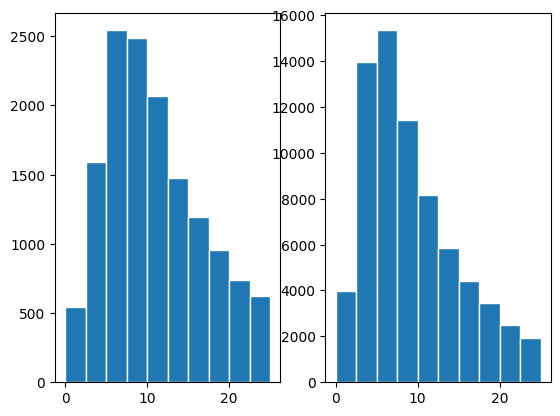

In [18]:
figura, eixos=plt.subplots(1,2)
eixos[0].hist(df_casual['duration'],range=(0,25),ec='white')
eixos[1].hist(df_member['duration'],range=(0,25),ec='white')

In [19]:
# Calculando média, quartis, desvio padrão, mínimo e máximo - Usuário casual

df_casual['duration'].describe()

count    18095.000000
mean        24.467703
std        178.506708
min          0.016667
25%          7.366667
50%         12.266667
75%         22.450000
max      19825.916667
Name: duration, dtype: float64

In [20]:
# Calculando média, quartis, desvio padrão, mínimo e máximo - Usuário member

df_member['duration'].describe()

count    78635.000000
mean        12.494131
std         23.833740
min          0.000000
25%          5.250000
50%          8.683333
75%         15.083333
max       1470.166667
Name: duration, dtype: float64

##### Observa-se que as médias estão distantes das medianas. Isso é devido à existência de outliers. No entanto, nota-se similaridade entre as medianas, indicando que não há correlação entre o usuário 'member' e a duração da corrida.

In [21]:
df_electric= df[df['rideable_type']=='electric_bike']
df_classic= df[df['rideable_type']=='classic_bike']
df_docked= df[df['rideable_type']=='docked_bike']

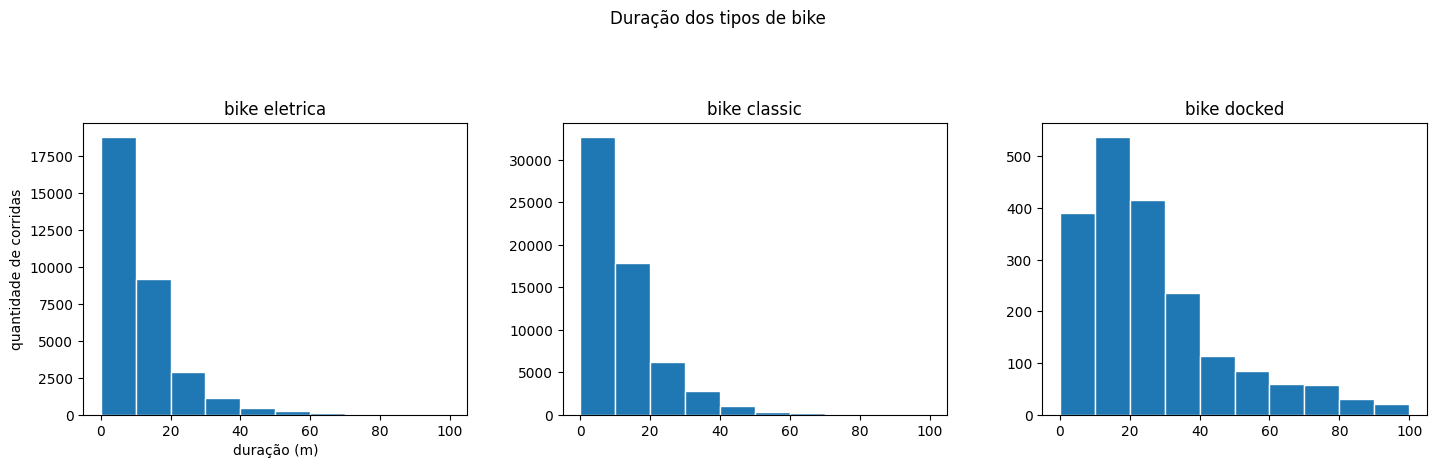

In [24]:
figura, eixos=plt.subplots(1,3,figsize=(15,5))
eixos[0].hist(df_electric['duration'],range=(0,100),ec='white')
eixos[1].hist(df_classic['duration'],range=(0,100),ec='white')
eixos[2].hist(df_docked['duration'],range=(0,100),ec='white')
figura.suptitle('Duração dos tipos de bike')
eixos[0].set_xlabel('duração (m)')
eixos[0].set_ylabel('quantidade de corridas')
eixos[0].set_title('bike eletrica')
eixos[1].set_title('bike classic')
eixos[2].set_title('bike docked')
figura.tight_layout(pad=3.0)

##### Métricas de média, quartis, desvio padrão, mínimo e máximo. Visualização por tipo de bicicleta.

In [25]:
df_electric['duration'].describe()

count    33027.000000
mean        12.438091
std         14.537077
min          0.000000
25%          5.166667
50%          8.650000
75%         14.950000
max        480.000000
Name: duration, dtype: float64

In [26]:
df_classic['duration'].describe()

count    61597.000000
mean        14.082934
std         31.898596
min          0.000000
25%          5.666667
50%          9.400000
75%         16.416667
max       1489.066667
Name: duration, dtype: float64

In [27]:
df_docked['duration'].describe()

count     2106.000000
mean        69.781481
std        509.808455
min          0.066667
25%         12.200000
50%         22.950000
75%         39.983333
max      19825.916667
Name: duration, dtype: float64

#### Comparando os dados nota-se que a duração das corridas com as bicicletas docked possui média e mediana maiores, a bicicleta elétrica é mais rápida e mostra uma duração de corrida um pouco menor em comparação com a bicicleta clássica. Quanto aos usuários da bicicleta docked, é possível que não estejam consumindo o tempo integral do aluguel.

# Aprendizado de máquina 

##### O objetivo é utilizar o aprendizado de máquina para prever através das colunas da tabela, qual o tipo de bicicleta que será utilizada em uma corrida.

In [28]:
# Alterando a coluna 'rideable_type' para valores inteiros

df['rideable_type']=df['rideable_type'].replace(['classic_bike', 'docked_bike', 'electric_bike'], [0,1,2])

In [29]:
# Alterando a coluna 'member_casual' para valores inteiros

df['member_casual']=df['member_casual'].replace(['member', 'casual'], [0,1])

In [30]:
# Definição da coluna 'rideable_type' como variável resposta (y) e das colunas 'duration' e 'member casual' como variáveis preditoras (X).

y=df['rideable_type'].astype('int')
X=df[['duration','member_casual']]

# Definindo os conjuntos de treino e teste

X_train, X_val, y_train, y_val=train_test_split(X,y)

In [31]:
# Definição e treinamento do classificador 'DecisionTreeClassifier'

clf=DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
# Predição

pred=clf.predict(X_val)

In [33]:
# Acurácia

accuracy_score(pred, y_val)

0.6283753049662987

In [36]:
# Matriz de confusão

confusion_matrix(y_val, pred)

array([[14063,   127,  1140],
       [  304,    73,   145],
       [ 7194,    77,  1060]], dtype=int64)

In [37]:
# Definição e treinamento do classificador 'RandomForestClassifier'

clf2=RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
# Predição

predict2=clf2.predict(X_val)

In [39]:
# Acurácia

accuracy_score(predict2, y_val)

0.625067195964107

In [40]:
# Matriz de confusão

confusion_matrix(y_val, predict2)

array([[13775,   139,  1416],
       [  264,    76,   182],
       [ 6978,    88,  1265]], dtype=int64)

In [41]:
# Definição e treinamento do classificador 'KNeighborsClassifier'

clf3=KNeighborsClassifier()
clf3.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
# Predição

predict3=clf3.predict(X_val)

In [43]:
# Acurácia

accuracy_score(predict3, y_val)

0.5841706984245131

In [44]:
# Matriz de confusão

confusion_matrix(y_val, predict3)

array([[11956,   111,  3263],
       [  307,    70,   145],
       [ 6151,    79,  2101]], dtype=int64)

# Conclusão

#### A acurácia obtida foi de 60% em média e as matrizes de confusão mostram houveram dados classificados incorretamente. Apesar disso, as bicicletas clássicas foram as mais fáceis de classificar. Possivelmente, as variáveis 'duração' e 'membro_casual' não possuem alta correlação com o tipo de bicicleta. Finalmente, comparando os três modelos de machine learning utilizados, se observa que o 'DecisionTreeClassfier' e o 'RandomForestClassfier' alcaçaram uma acurácia melhor do que o 'KNeighborsClassifier'. 